In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [128]:
data=pd.read_csv('titani.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

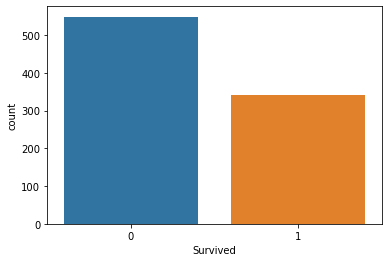

In [131]:
sns.countplot(data['Survived'])

In [132]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

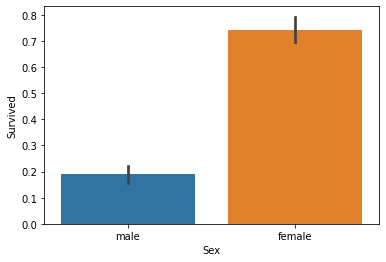

In [134]:
sns.barplot(x='Sex',y='Survived',data=data)

In [135]:
data=data.drop(['Name','Cabin','Ticket'],axis=1)

In [136]:
data=data.dropna(subset=['Age','Embarked'])

In [137]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [138]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [139]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [140]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [141]:
data.iloc[:,3]=LabelEncoder().fit_transform(data.iloc[:,3].values)

In [149]:
data.iloc[:,8]=LabelEncoder().fit_transform(data.iloc[:,8].values)

In [150]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [151]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=200)

In [210]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train)

In [211]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.007517,PassengerId
1,2.017732,Pclass
2,1.107601,Sex
3,1.374251,Age
4,1.324001,SibSp
5,1.308479,Parch
6,1.931372,Fare
7,1.098185,Embarked


In [222]:
def models(x_train,y_train):
    log = LogisticRegression(random_state=20)
    log.fit(x_train, y_train)
    
    svc_lin = SVC(kernel='linear', random_state =10)
    svc_lin.fit(x_train,y_train)
    
    svc_lin_rbf = SVC(kernel='rbf')
    svc_lin_rbf.fit(x_train,y_train)
    
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)
    tree.fit(x_train, y_train)
    
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
    forest.fit(x_train, y_train)
    
    
    print('Model Score:',log.score(x_train,y_train))
    print('Model Score:',svc_lin.score(x_train,y_train))
    print('Model Score:',svc_lin_rbf.score(x_train,y_train))
    print('Model Score:',tree.score(x_train,y_train))
    print('Model Score:',forest.score(x_train,y_train))
    
    
    return log,svc_lin, svc_lin_rbf,tree, forest

In [223]:
model=models(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score: 0.7751004016064257
Model Score: 0.7811244979919679
Model Score: 0.6566265060240963
Model Score: 1.0
Model Score: 0.9799196787148594


In [232]:
pred=model[4]

In [224]:
parameter={'n_estimators':[100,120,145,177,180],
          'criterion':["gini","entropy"],
          'max_depth':range(2,10,2),
          'min_samples_leaf':range(2,10,2),
          'min_samples_split':range(2,10,2),
          'max_features':['auto','log2']}

In [233]:
G_search=GridSearchCV(estimator=pred,param_grid=parameter,cv=3,n_jobs = -1, verbose = 2)

In [235]:
G_search.fit(x_train,y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10,
                                              random_state=40),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 120, 145, 177, 180]},
             verbose=2)

In [236]:
G_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [237]:
pred=RandomForestClassifier(criterion='entropy',
 max_depth=4,
 max_features='auto',
 min_samples_leaf=2,
 min_samples_split=8,
 n_estimators=100,random_state=60)

In [238]:
pred.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=8, random_state=60)

In [240]:
pred.score(x_train,y_train)

0.857429718875502

In [250]:
print(pred.predict(x_test))

print()

[0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0]



In [264]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[109   7]
 [ 38  60]]


In [265]:
rf_acc=accuracy_score(y_test, y_pred)*100
print(rf_acc)

78.97196261682244
